## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
import pandas as pd
import numpy as np

data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [70]:
x_df = pd.DataFrame(data.data, columns=data.feature_names)
y_df = pd.DataFrame(data.target, columns=["target"])
df = pd.concat([x_df, y_df], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [71]:
df[df.isnull() == True]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN


In [72]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=1)

# 使用classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred)
print("準確率: ", acc)

準確率:  0.9736842105263158


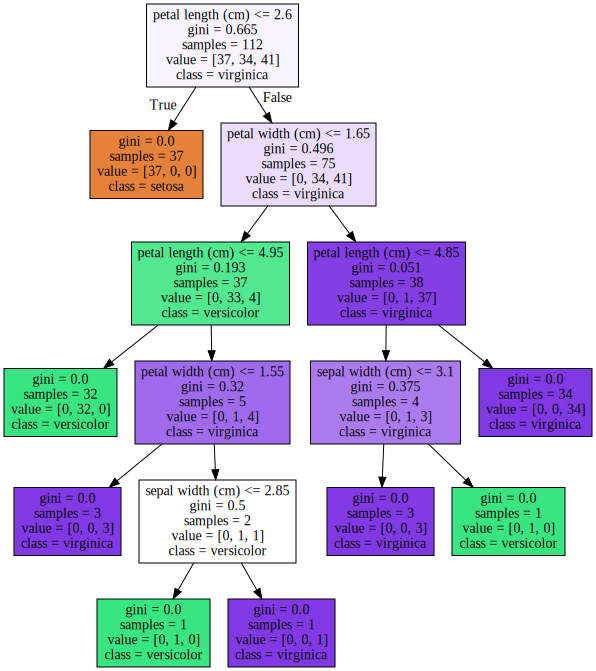

In [75]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(clf, out_file=None, feature_names=data.feature_names, class_names=data.target_names, max_depth=None, filled=True, special_characters=False)
graph = graphviz.Source(g)
graph

In [76]:
matrix = confusion_matrix(y_test, pred)
matrix_df = pd.DataFrame(matrix, columns=data.target_names, index=data.target_names)
matrix_df

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


In [77]:
# 使用regression
rlf = DecisionTreeRegressor(criterion="mse", max_depth=None, min_samples_split=2)
rlf.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [78]:
pred_ = rlf.predict(x_test)
acc = accuracy_score(y_test, pred_)
print("準確率: ", acc)

準確率:  0.9736842105263158


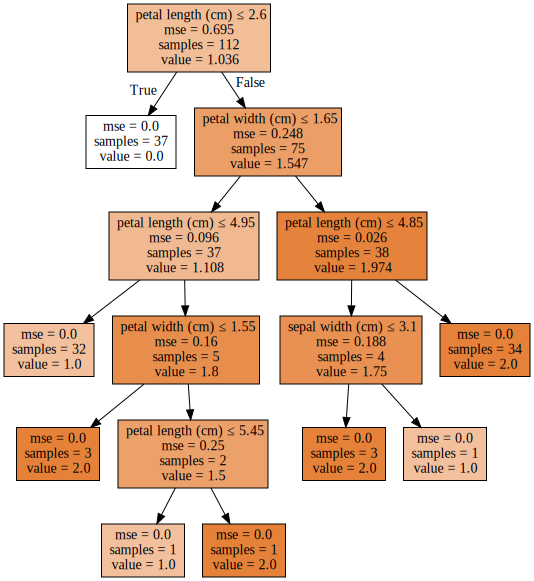

In [79]:
# ubuntu install information
# sudo apt-get install graphviz
# don't use "pip3 install graphviz" on ubuntu

from sklearn.tree import export_graphviz
import graphviz
# 參數 filled 讓graphviz變得漂亮點，填入顏色。
g = export_graphviz(rlf,out_file = None,
                feature_names = data.feature_names, class_names = data.target_names, filled=True, special_characters=True)

# 產生決策圖並印出。
graph = graphviz.Source(g)
graph

### 以下load boston dataset

In [80]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [81]:
x_df = pd.DataFrame(data.data, columns=data.feature_names)
y_df = pd.DataFrame(data.target, columns=["target"])
df = pd.concat([x_df, y_df], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
df[df.isnull() == True]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.25, random_state=1)

# 調整時要注意random_state要設定,不然基準點不同無法比較
# 調整深度時,發現使用decision系列的結果值浮動很大,有時表現較linear系列佳
rlf = DecisionTreeRegressor(criterion="mse", max_depth=4, min_samples_split=2, random_state=1)
rlf.fit(x_train, y_train)

pred__ = rlf.predict(x_test)
mse = mean_squared_error(y_test, pred__)
r2 = r2_score(y_test, pred__)
print("MSE: ", mse)
print("r2: ", r2)

MSE:  13.826265704678221
r2:  0.8604231903822975


In [85]:
from sklearn.linear_model import LinearRegression, Ridge

lr = LinearRegression()
lr.fit(x_train, y_train)
_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, _pred)
r2 = r2_score(y_test, _pred)
print("MSE: ", mse)
print("r2: ", r2)

MSE:  21.897765396049444
r2:  0.7789410172622863


In [86]:
ridge = Ridge(alpha=2)
ridge.fit(x_train, y_train)
__pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, __pred)
r2 = r2_score(y_test, __pred)
print("MSE: ", mse)
print("r2: ", r2)

MSE:  21.29598264926334
r2:  0.7850160427010757
